In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

## 6.2 Preparing

In [2]:
from  data_loader import load_detrended_ssta
ssta, lon2, lat2, y, m  = load_detrended_ssta()

In [3]:
ssta = ssta[:, :, (1982 <= y)*(y <=2019)]
m = m[(1982 <= y)*(y <=2019)]
y = y[(1982 <= y)*(y <=2019)]

In [4]:
def draw_ssta(ssta, draw_year, draw_month, vmin =-6, vmax = 6, vint = 1, \
              fig_title = 'SST anomalies'):    
    plt.figure()
    cm = plt.get_cmap('seismic')
    cs = plt.contourf(lon2, lat2, \
                      np.squeeze(ssta[:, :, (y==draw_year)*(m==draw_month)]), \
                      cmap=cm, norm=Normalize(vmin=vmin, vmax=vmax), \
                      levels=np.arange(vmin, vmax+vint, vint), extend='both')
    plt.colorbar(cs)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    title = fig_title + str(draw_year) + '/' + str(draw_month)
    plt.title(title)

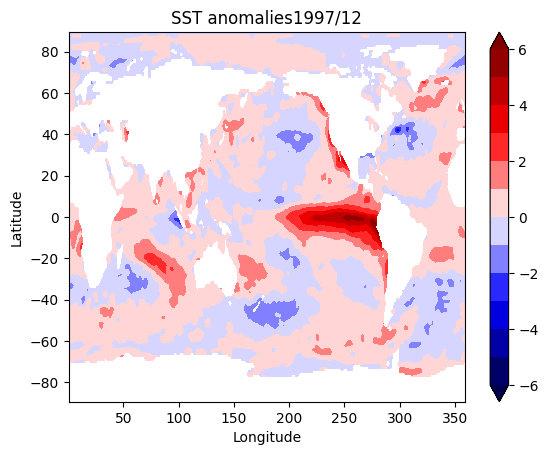

In [5]:
# El Niño
draw_ssta(ssta, 1997, 12)

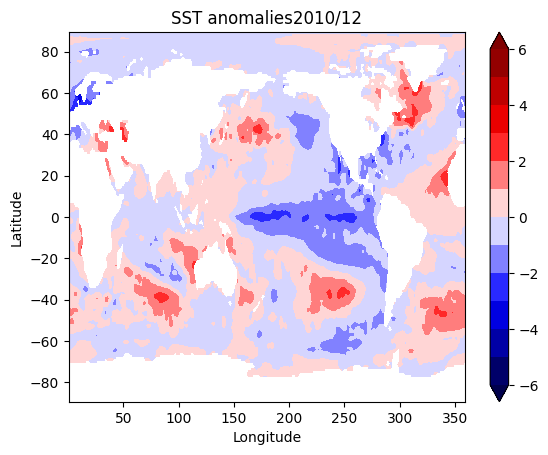

In [6]:
# La Niña
draw_ssta(ssta, 2010, 12)

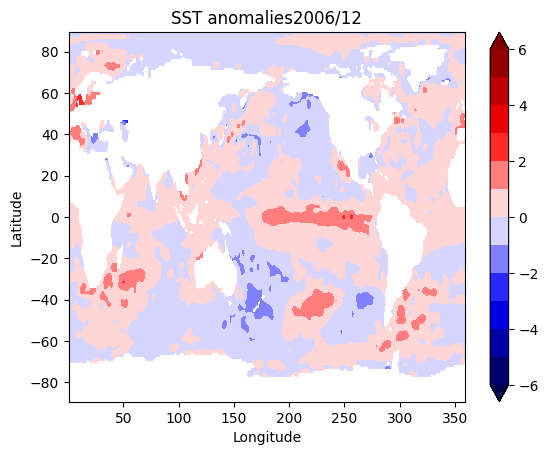

In [7]:
# a little week El Niño
draw_ssta(ssta, 2006, 12)

## 6.3 Calculate Niño3.4 Index

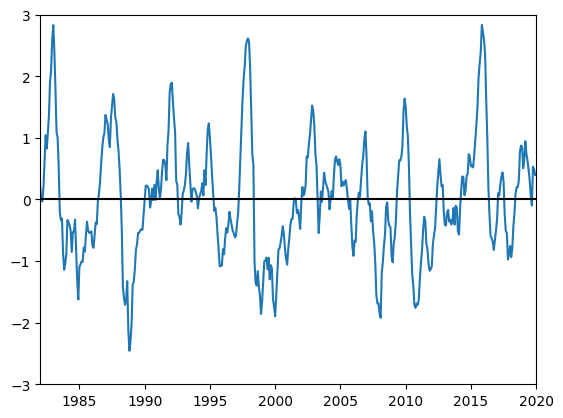

In [8]:
nino34ssta_data = ssta[(190<=lon2[:, 1])*(lon2[:, 1]<=240), :, :]

nino34ssta_data = nino34ssta_data[:, (-5<=lat2[1, :])*(lat2[1, :]<=5), :]

nino34 = np.nanmean(np.nanmean(nino34ssta_data, 0), 0)

mon = np.arange(1982, 2020, 1/12)
plt.plot(mon, nino34)
plt.plot(mon, 0*nino34, 'k')
plt.xlim(1982, 2020)
plt.ylim(-3, 3)
plt.show()

In [9]:
def aave(west, east, south, north, var = ssta):
    var = var[(west<=lon2[:, 1])*(lon2[:, 1]<=east), :, :]
    var = var[:, (south<=lat2[1, :])*(lat2[1, :]<=north), :]
    aave_var = np.nanmean(np.nanmean(var, 0), 0)
    return aave_var

def plot_mon_time(time_series, lower = -3, upper = 3, \
                  init_year=1982, fin_year=2020):
    mon = np.arange(1982, 2020, 1/12)
    plt.figure;
    plt.plot(mon, time_series)
    plt.plot(mon, 0*time_series, 'k')
    plt.xlim(init_year, fin_year)
    plt.ylim(lower, upper)
    plt.show()
    

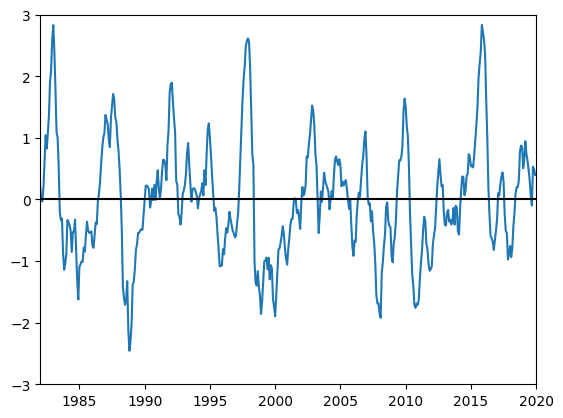

In [10]:
nino34 = aave(190, 240, -5, 5)
plot_mon_time(nino34)

### 6.4.3 Nno3

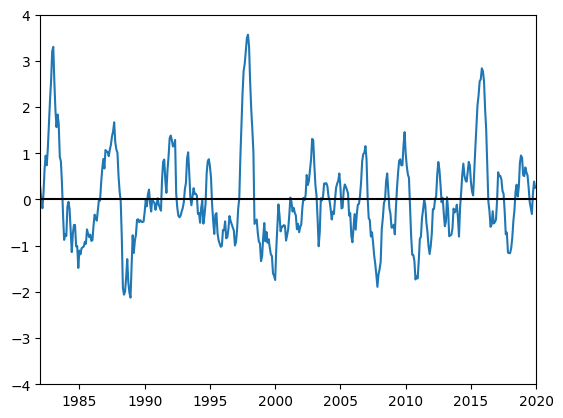

In [11]:
nino3 = aave(210, 270, -5, 5)
plot_mon_time(nino3, -4, 4)

### 6.4.4 Nino Modoki

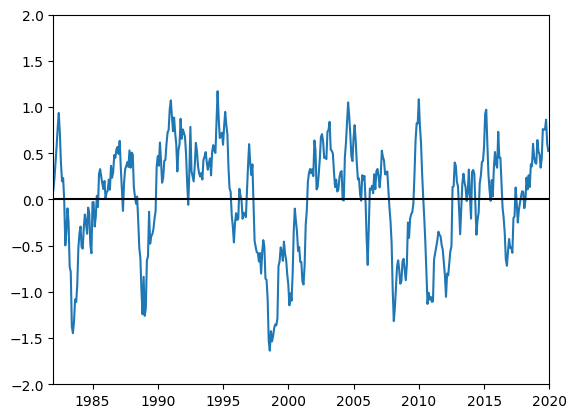

In [12]:
emi = aave(165, 220, -10, 10) - 0.5 * aave(250, 290, -15, 5) - 0.5*aave(125, 145, -10, 20)

plot_mon_time(emi, -2, 2)